In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_excel('Data/LFB Incident data from January 2009 to December 2012.xlsx')

In [3]:
mask = (df['DateOfCall'] >= '2011-01-01') & (df['DateOfCall'] <= '2012-12-31')
df0=df.loc[mask]
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224540 entries, 260516 to 485055
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          224540 non-null  int64         
 1   DateOfCall                              224540 non-null  datetime64[ns]
 2   CalYear                                 224540 non-null  int64         
 3   TimeOfCall                              224540 non-null  object        
 4   HourOfCall                              224540 non-null  int64         
 5   IncidentGroup                           224540 non-null  object        
 6   StopCodeDescription                     224540 non-null  object        
 7   SpecialServiceType                      66007 non-null   object        
 8   PropertyCategory                        224540 non-null  object        
 9   PropertyType                    

In [4]:
df0.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending
260516,1111,2011-01-01,2011,00:03:15,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,524050,186850,London,West Hampstead,551.0,West Hampstead,NaN,NaN,1.0,1.0
260517,2111,2011-01-01,2011,00:04:01,0,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,553650,192050,London,Harold Hill,339.0,Harold Hill,NaN,NaN,1.0,1.0
260518,4111,2011-01-01,2011,00:06:29,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,538350,186850,London,Leyton,241.0,Leyton,NaN,NaN,1.0,1.0
260519,5111,2011-01-01,2011,00:06:50,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,529350,177950,London,Lambeth,330.0,Chelsea,NaN,NaN,1.0,1.0
260520,6111,2011-01-01,2011,00:07:48,0,False Alarm,False alarm - Malicious,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,542050,176750,London,East Greenwich,291.0,East Greenwich,NaN,NaN,2.0,2.0


Now create the reagression plot
Now we must be clear that what is our depend variable and independ variable 
If we  want to predict average response time of that day

Since different types of incidents have a significant differnece in response time 
Then we need to know that how many different types of incidents is probably going to happen that day 

Count or ratio? 
If count, we assume that the number of incidents will affect the reponse time of that day
that is to say, two many incidents will slow down the response time

If ratio, we assume only the ratio of incidents will affect response time,that is to say, the total average response time of 1000 , 500:500 is same to 100,50:50. 

看结果说话

In [ ]:
#Now we run a ks-test maybe not very properly

In [5]:
#df00 = df0.dropna(subset=['FirstPumpArriving_AttendanceTime'])
#x1 = df00.loc[df00.PropertyCategory=='Dwelling', 'FirstPumpArriving_AttendanceTime']
#x2 = df00.loc[df00.PropertyCategory=='Non Residential', 'FirstPumpArriving_AttendanceTime']
#x3 = df00.loc[df00.PropertyCategory=='Outdoor', 'FirstPumpArriving_AttendanceTime']
#x4 = df00.loc[df00.PropertyCategory=='Road Vehicle', 'FirstPumpArriving_AttendanceTime']
#x5 = df00.loc[df00.PropertyCategory=='Other Residential', 'FirstPumpArriving_AttendanceTime']
#x6 = df00.loc[df00.PropertyCategory=='Outdoor Structure', 'FirstPumpArriving_AttendanceTime']

#Now we build the regression model by our door structure

In [6]:
df00 = df0[(df0.PropertyCategory.isin(["Dwelling","Non Residential","Outdoor","Road Vehicle","Other Residential","Outdoor Structure"]))]

In [7]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224056 entries, 260516 to 485055
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          224056 non-null  int64         
 1   DateOfCall                              224056 non-null  datetime64[ns]
 2   CalYear                                 224056 non-null  int64         
 3   TimeOfCall                              224056 non-null  object        
 4   HourOfCall                              224056 non-null  int64         
 5   IncidentGroup                           224056 non-null  object        
 6   StopCodeDescription                     224056 non-null  object        
 7   SpecialServiceType                      65712 non-null   object        
 8   PropertyCategory                        224056 non-null  object        
 9   PropertyType                    

In [8]:
df00 = df00[['DateOfCall', 'PropertyCategory',"FirstPumpArriving_AttendanceTime","NumPumpsAttending"]]

In [9]:
df00.head()

,DateOfCall,PropertyCategory,FirstPumpArriving_AttendanceTime,NumPumpsAttending
260516,2011-01-01,Outdoor,551.0,1.0
260517,2011-01-01,Dwelling,339.0,1.0
260518,2011-01-01,Outdoor,241.0,1.0
260519,2011-01-01,Dwelling,330.0,1.0
260520,2011-01-01,Dwelling,291.0,2.0


In [10]:
df00.isnull().sum()

DateOfCall                              0
PropertyCategory                        0
FirstPumpArriving_AttendanceTime    24377
NumPumpsAttending                    1180
dtype: int64

In [11]:
#clean the null value
df00 = df00.dropna(subset=['FirstPumpArriving_AttendanceTime',"NumPumpsAttending"])

In [12]:
df00.NumPumpsAttending = df00.NumPumpsAttending.astype('int64') 

In [13]:
a = df00[(df00.PropertyCategory.isin(["Dwelling"]))]

In [14]:
a_count = a.groupby(a['DateOfCall'].dt.date).size().reset_index(name='DwellingCount')
a_count['days_since_2011'] = np.arange(len(a_count))
a_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DateOfCall       731 non-null    object
 1   DwellingCount    731 non-null    int64 
 2   days_since_2011  731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB


In [15]:
a_time= a.groupby('DateOfCall', as_index=False, sort=False)['FirstPumpArriving_AttendanceTime'].mean()
a_time['days_since_2011'] = np.arange(len(a_time))
a_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateOfCall                        731 non-null    datetime64[ns]
 1   FirstPumpArriving_AttendanceTime  731 non-null    float64       
 2   days_since_2011                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.8 KB


In [16]:
a_num= a.groupby('DateOfCall', as_index=False, sort=False)['NumPumpsAttending'].mean()
a_num['days_since_2011'] = np.arange(len(a_num))
a_num.head()

,DateOfCall,NumPumpsAttending,days_since_2011
0,2011-01-01,1.777778,0
1,2011-01-02,1.702970,1
2,2011-01-03,1.813559,2
3,2011-01-04,1.885714,3
4,2011-01-05,1.852941,4


In [17]:
#a1=pd.merge(a_count, a_time,on="days_since_2011")
a1 = pd.merge(a_count,a_time[['days_since_2011','FirstPumpArriving_AttendanceTime']],on='days_since_2011', how='left')
a1 = pd.merge(a1,a_num[['days_since_2011','NumPumpsAttending']],on='days_since_2011', how='left')
a1=a1.rename(columns = {'NumPumpsAttending':'Dwelling_Num'})
a1=a1.rename(columns = {'FirstPumpArriving_AttendanceTime':'Dwelling_time'})
a1.head()

,DateOfCall,DwellingCount,days_since_2011,Dwelling_time,Dwelling_Num
0,2011-01-01,153,0,316.496732,1.777778
1,2011-01-02,101,1,324.732673,1.702970
2,2011-01-03,118,2,304.584746,1.813559
3,2011-01-04,105,3,324.209524,1.885714
4,2011-01-05,102,4,310.284314,1.852941


In [23]:
b = df00[(df00.PropertyCategory.isin(["Non Residential"]))]
#
b_count = b.groupby(b['DateOfCall'].dt.date).size().reset_index(name='NonResidential_Count')
b_count['days_since_2011'] = np.arange(len(a_count))
b_count.info()
#
b_time= b.groupby('DateOfCall', as_index=False, sort=False)['FirstPumpArriving_AttendanceTime'].mean()
b_time['days_since_2011'] = np.arange(len(a_time))
b_time.info()
#
b_num= b.groupby('DateOfCall', as_index=False, sort=False)['NumPumpsAttending'].mean()
b_num['days_since_2011'] = np.arange(len(a_num))
b_num.head()
#
b1 = pd.merge(b_count,b_time[['days_since_2011','FirstPumpArriving_AttendanceTime']],on='days_since_2011', how='left')
b1 = pd.merge(b1,b_num[['days_since_2011','NumPumpsAttending']],on='days_since_2011', how='left')
#
b1=b1.rename(columns = {'NumPumpsAttending':'NonResidential_Num'})
b1=b1.rename(columns = {'FirstPumpArriving_AttendanceTime':'NonResidential_time'})
b1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DateOfCall            731 non-null    object
 1   NonResidential_Count  731 non-null    int64 
 2   days_since_2011       731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateOfCall                        731 non-null    datetime64[ns]
 1   FirstPumpArriving_AttendanceTime  731 non-null    float64       
 2   days_since_2011                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.8 KB


,DateOfCall,NonResidential_Count,days_since_2011,NonResidential_time,NonResidential_Num
0,2011-01-01,66,0,290.878788,1.530303
1,2011-01-02,40,1,313.475000,1.450000
2,2011-01-03,33,2,285.878788,1.909091
3,2011-01-04,66,3,311.681818,1.242424
4,2011-01-05,61,4,310.180328,1.459016


In [19]:
b = df00[(df00.PropertyCategory.isin(["Outdoor"]))]
#
b_count = b.groupby(b['DateOfCall'].dt.date).size().reset_index(name='Outdoor_Count')
b_count['days_since_2011'] = np.arange(len(a_count))
b_count.info()
#
b_time= b.groupby('DateOfCall', as_index=False, sort=False)['FirstPumpArriving_AttendanceTime'].mean()
b_time['days_since_2011'] = np.arange(len(a_time))
b_time.info()
#
b_num= b.groupby('DateOfCall', as_index=False, sort=False)['NumPumpsAttending'].mean()
b_num['days_since_2011'] = np.arange(len(a_num))
b_num.head()
#
b1 = pd.merge(b_count,b_time[['days_since_2011','FirstPumpArriving_AttendanceTime']],on='days_since_2011', how='left')
b1 = pd.merge(b1,b_num[['days_since_2011','NumPumpsAttending']],on='days_since_2011', how='left')
#
b1=b1.rename(columns = {'NumPumpsAttending':'Outdoor_Num'})
b1=b1.rename(columns = {'FirstPumpArriving_AttendanceTime':'Outdoor_time'})
c1=b1
c1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DateOfCall       731 non-null    object
 1   Outdoor_Count    731 non-null    int64 
 2   days_since_2011  731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateOfCall                        731 non-null    datetime64[ns]
 1   FirstPumpArriving_AttendanceTime  731 non-null    float64       
 2   days_since_2011                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.8 KB


,DateOfCall,Outdoor_Count,days_since_2011,Outdoor_time,Outdoor_Num
0,2011-01-01,17,0,330.882353,1.235294
1,2011-01-02,19,1,396.263158,1.315789
2,2011-01-03,16,2,321.687500,1.375000
3,2011-01-04,17,3,366.176471,1.235294
4,2011-01-05,12,4,349.250000,1.666667


In [20]:
b = df00[(df00.PropertyCategory.isin(["Road Vehicle"]))]
#
b_count = b.groupby(b['DateOfCall'].dt.date).size().reset_index(name='RoadVehicle_Count')
b_count['days_since_2011'] = np.arange(len(a_count))
b_count.info()
#
b_time= b.groupby('DateOfCall', as_index=False, sort=False)['FirstPumpArriving_AttendanceTime'].mean()
b_time['days_since_2011'] = np.arange(len(a_time))
b_time.info()
#
b_num= b.groupby('DateOfCall', as_index=False, sort=False)['NumPumpsAttending'].mean()
b_num['days_since_2011'] = np.arange(len(a_num))
b_num.head()
#
b1 = pd.merge(b_count,b_time[['days_since_2011','FirstPumpArriving_AttendanceTime']],on='days_since_2011', how='left')
b1 = pd.merge(b1,b_num[['days_since_2011','NumPumpsAttending']],on='days_since_2011', how='left')
#
b1=b1.rename(columns = {'NumPumpsAttending':'RoadVehicle_Num'})
b1=b1.rename(columns = {'FirstPumpArriving_AttendanceTime':'RoadVehicle_time'})
d1=b1
d1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DateOfCall         731 non-null    object
 1   RoadVehicle_Count  731 non-null    int64 
 2   days_since_2011    731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateOfCall                        731 non-null    datetime64[ns]
 1   FirstPumpArriving_AttendanceTime  731 non-null    float64       
 2   days_since_2011                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.8 KB


,DateOfCall,RoadVehicle_Count,days_since_2011,RoadVehicle_time,RoadVehicle_Num
0,2011-01-01,27,0,340.185185,1.333333
1,2011-01-02,17,1,368.882353,1.529412
2,2011-01-03,18,2,300.388889,1.444444
3,2011-01-04,19,3,315.368421,1.421053
4,2011-01-05,13,4,363.538462,1.923077


In [21]:
b = df00[(df00.PropertyCategory.isin(["Other Residential"]))]
#
b_count = b.groupby(b['DateOfCall'].dt.date).size().reset_index(name='OtherResidential_Count')
b_count['days_since_2011'] = np.arange(len(a_count))
b_count.info()
#
b_time= b.groupby('DateOfCall', as_index=False, sort=False)['FirstPumpArriving_AttendanceTime'].mean()
b_time['days_since_2011'] = np.arange(len(a_time))
b_time.info()
#
b_num= b.groupby('DateOfCall', as_index=False, sort=False)['NumPumpsAttending'].mean()
b_num['days_since_2011'] = np.arange(len(a_num))
b_num.head()
#
b1 = pd.merge(b_count,b_time[['days_since_2011','FirstPumpArriving_AttendanceTime']],on='days_since_2011', how='left')
b1 = pd.merge(b1,b_num[['days_since_2011','NumPumpsAttending']],on='days_since_2011', how='left')
#
b1=b1.rename(columns = {'NumPumpsAttending':'OtherResidential_Num'})
b1=b1.rename(columns = {'FirstPumpArriving_AttendanceTime':'OtherResidential_time'})
e1=b1
e1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateOfCall              731 non-null    object
 1   OtherResidential_Count  731 non-null    int64 
 2   days_since_2011         731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateOfCall                        731 non-null    datetime64[ns]
 1   FirstPumpArriving_AttendanceTime  731 non-null    float64       
 2   days_since_2011                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.8 KB


,DateOfCall,OtherResidential_Count,days_since_2011,OtherResidential_time,OtherResidential_Num
0,2011-01-01,28,0,285.500000,2.000000
1,2011-01-02,20,1,239.550000,2.250000
2,2011-01-03,18,2,263.666667,2.333333
3,2011-01-04,21,3,276.285714,1.809524
4,2011-01-05,10,4,320.000000,2.200000


In [22]:
b = df00[(df00.PropertyCategory.isin(["Outdoor Structure"]))]
#
b_count = b.groupby(b['DateOfCall'].dt.date).size().reset_index(name='OutdoorStructure_Count')
b_count['days_since_2011'] = np.arange(len(a_count))
b_count.info()
#
b_time= b.groupby('DateOfCall', as_index=False, sort=False)['FirstPumpArriving_AttendanceTime'].mean()
b_time['days_since_2011'] = np.arange(len(a_time))
b_time.info()
#
b_num= b.groupby('DateOfCall', as_index=False, sort=False)['NumPumpsAttending'].mean()
b_num['days_since_2011'] = np.arange(len(a_num))
b_num.head()
#
b1 = pd.merge(b_count,b_time[['days_since_2011','FirstPumpArriving_AttendanceTime']],on='days_since_2011', how='left')
b1 = pd.merge(b1,b_num[['days_since_2011','NumPumpsAttending']],on='days_since_2011', how='left')
#
b1=b1.rename(columns = {'NumPumpsAttending':'OutdoorStructure_Num'})
b1=b1.rename(columns = {'FirstPumpArriving_AttendanceTime':'OutdoorStructure_time'})
f1=b1
f1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateOfCall              731 non-null    object
 1   OutdoorStructure_Count  731 non-null    int64 
 2   days_since_2011         731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateOfCall                        731 non-null    datetime64[ns]
 1   FirstPumpArriving_AttendanceTime  731 non-null    float64       
 2   days_since_2011                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.8 KB


,DateOfCall,OutdoorStructure_Count,days_since_2011,OutdoorStructure_time,OutdoorStructure_Num
0,2011-01-01,17,0,348.705882,1.235294
1,2011-01-02,14,1,353.928571,1.000000
2,2011-01-03,12,2,327.916667,1.083333
3,2011-01-04,14,3,362.857143,1.357143
4,2011-01-05,12,4,315.333333,1.333333


In [24]:
#Don't forget to run b1 again, bad coding indeed
#a1,b1,c1,d1,e1,f1.
#a1=a1.drop(['days_since_2011'],axis=1)
b1=b1.drop(['days_since_2011'],axis=1)
c1=c1.drop(['days_since_2011'],axis=1)
d1=d1.drop(['days_since_2011'],axis=1)
e1=e1.drop(['days_since_2011'],axis=1)
f1=f1.drop(['days_since_2011'],axis=1)

df_sum=a1.merge(b1, how='left', left_on='DateOfCall', right_on='DateOfCall').merge(c1, how='left', left_on='DateOfCall', right_on='DateOfCall').merge(d1, how='left', left_on='DateOfCall', right_on='DateOfCall').merge(e1, how='left', left_on='DateOfCall', right_on='DateOfCall').merge(f1, how='left', left_on='DateOfCall', right_on='DateOfCall')

In [25]:
df_sum['days_since_2011'] = np.arange(len(df_sum))
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateOfCall              731 non-null    object 
 1   DwellingCount           731 non-null    int64  
 2   days_since_2011         731 non-null    int64  
 3   Dwelling_time           731 non-null    float64
 4   Dwelling_Num            731 non-null    float64
 5   NonResidential_Count    731 non-null    int64  
 6   NonResidential_time     731 non-null    float64
 7   NonResidential_Num      731 non-null    float64
 8   Outdoor_Count           731 non-null    int64  
 9   Outdoor_time            731 non-null    float64
 10  Outdoor_Num             731 non-null    float64
 11  RoadVehicle_Count       731 non-null    int64  
 12  RoadVehicle_time        731 non-null    float64
 13  RoadVehicle_Num         731 non-null    float64
 14  OtherResidential_Count  731 non-null    in

In [26]:
#Now adding total count average time of that day
dfsub_count = df00.groupby(df00['DateOfCall'].dt.date).size().reset_index(name='TotalCount')
dfsub_time = df00.groupby('DateOfCall', as_index=False, sort=False)['FirstPumpArriving_AttendanceTime'].mean()
dfsub_count['days_since_2011'] = np.arange(len(dfsub_count))
dfsub_time['days_since_2011'] = np.arange(len(dfsub_time))
dfsub_count.info()
dfsub_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DateOfCall       731 non-null    object
 1   TotalCount       731 non-null    int64 
 2   days_since_2011  731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateOfCall                        731 non-null    datetime64[ns]
 1   FirstPumpArriving_AttendanceTime  731 non-null    float64       
 2   days_since_2011                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.8 KB


In [27]:
df_sub=dfsub_count.merge(dfsub_time, how='left', left_on='days_since_2011', right_on='days_since_2011')
df_sub=df_sub.drop(['DateOfCall_y',"DateOfCall_x"],axis=1)
df_sub=df_sub.rename(columns = {'FirstPumpArriving_AttendanceTime':'Averagetime'})
df_sub.head()

,TotalCount,days_since_2011,Averagetime
0,308,0,312.837662
1,211,1,326.459716
2,215,2,300.511628
3,242,3,321.123967
4,210,4,316.528571


In [28]:
df_final=df_sum.merge(df_sub, how='left', left_on='days_since_2011', right_on='days_since_2011')
df_final.set_index('days_since_2011')
df_final=df_final.drop(["DateOfCall"],axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DwellingCount           731 non-null    int64  
 1   days_since_2011         731 non-null    int64  
 2   Dwelling_time           731 non-null    float64
 3   Dwelling_Num            731 non-null    float64
 4   NonResidential_Count    731 non-null    int64  
 5   NonResidential_time     731 non-null    float64
 6   NonResidential_Num      731 non-null    float64
 7   Outdoor_Count           731 non-null    int64  
 8   Outdoor_time            731 non-null    float64
 9   Outdoor_Num             731 non-null    float64
 10  RoadVehicle_Count       731 non-null    int64  
 11  RoadVehicle_time        731 non-null    float64
 12  RoadVehicle_Num         731 non-null    float64
 13  OtherResidential_Count  731 non-null    int64  
 14  OtherResidential_time   731 non-null    fl

In [29]:
#Let's do the regression 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
%matplotlib inline

Text(0.5, 1.0, 'Correlation Matrix')

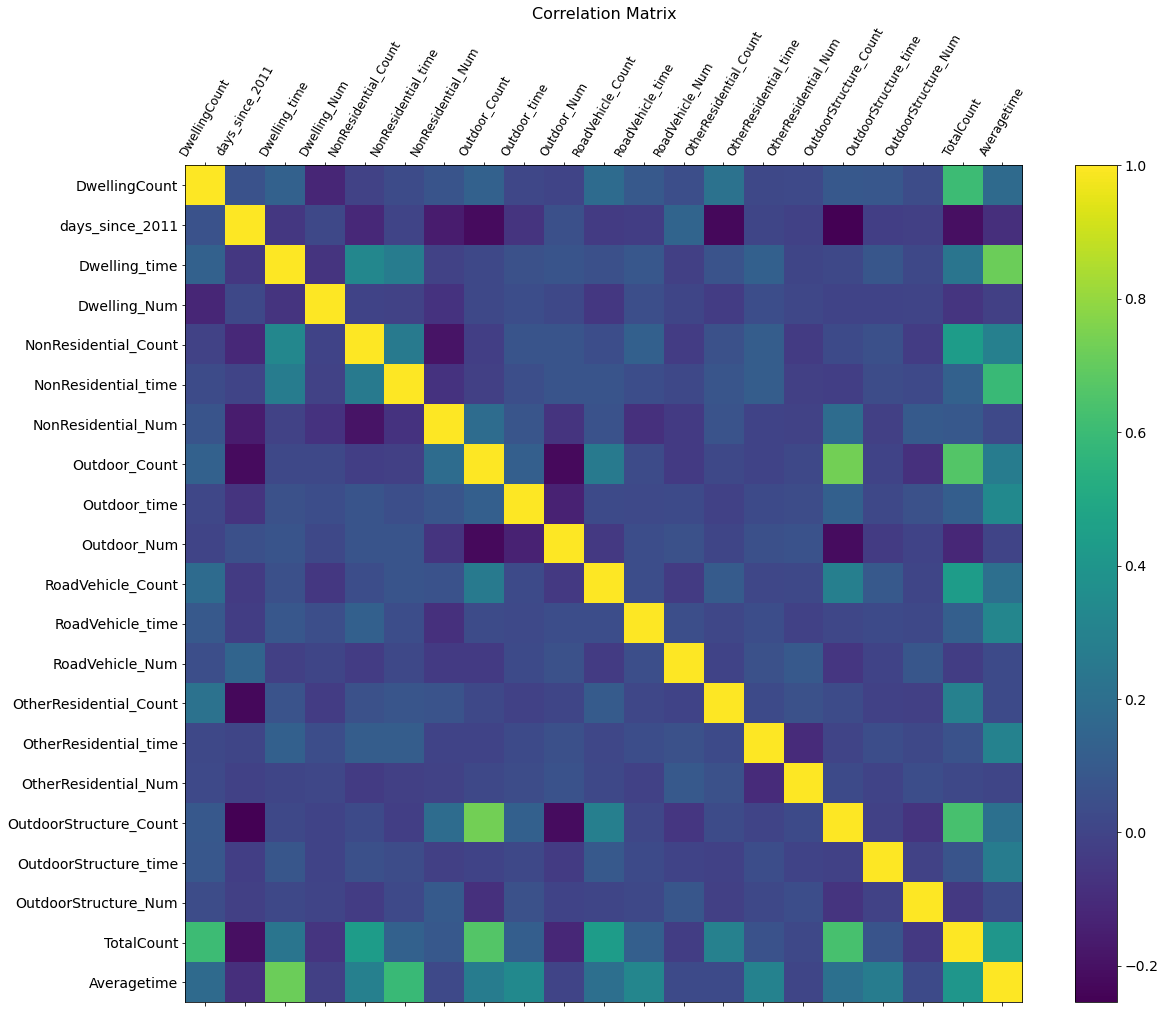

In [30]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df_final.corr(), fignum=f.number)
plt.xticks(range(df_final.shape[1]), df_final.columns, fontsize=12, rotation=60)
plt.yticks(range(df_final.shape[1]), df_final.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### important to set VIF funtion

In [31]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df1, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df1)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df1 = df1.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df1

In [62]:
df_predictors_selected_VIF = drop_column_using_vif_(df_final.drop('Averagetime', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: DwellingCount
Dropping: TotalCount
The columns remaining after VIF selection are:
Index(['days_since_2011', 'Dwelling_time', 'Dwelling_Num',
       'NonResidential_Count', 'NonResidential_time', 'NonResidential_Num',
       'Outdoor_Count', 'Outdoor_time', 'Outdoor_Num', 'RoadVehicle_Count',
       'RoadVehicle_time', 'RoadVehicle_Num', 'OtherResidential_Count',
       'OtherResidential_time', 'OtherResidential_Num',
       'OutdoorStructure_Count', 'OutdoorStructure_time',
       'OutdoorStructure_Num'],
      dtype='object')


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
#df.drop(columns=['B', 'C'])

In [72]:
df_final=df_final.drop(columns=['Dwelling_time', 'Dwelling_Num','NonResidential_time', 'NonResidential_Num', 'Outdoor_time', 'Outdoor_Num',  'RoadVehicle_time','RoadVehicle_Num',  'OtherResidential_time',
       'OtherResidential_Num', 
       'OutdoorStructure_time', 'OutdoorStructure_Num','days_since_2011'])

In [73]:
df_predictors_selected_VIF=df_predictors_selected_VIF.drop(columns=['Dwelling_time', 'Dwelling_Num','NonResidential_time', 'NonResidential_Num', 'Outdoor_time', 'Outdoor_Num',  'RoadVehicle_time','RoadVehicle_Num',  'OtherResidential_time',
       'OtherResidential_Num', 
       'OutdoorStructure_time', 'OutdoorStructure_Num','days_since_2011'])

In [74]:
model_df = sm.OLS(endog=df_final[['Averagetime']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Averagetime   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     31.77
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.61e-29
Time:                        18:08:33   Log-Likelihood:                -2777.1
No. Observations:                 731   AIC:                             5566.
Df Residuals:                     725   BIC:                             5594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    290.2083      2.742    105.831      0.000     284.825     295.592
NonResidential_Count       0.2173      0.025      8.677      0.000       0.168       0.266
Outdoor_Count              0.2216      0.041      5.458      0.000       0.142       0.301
RoadVehicle_Count          0.2982      0.079      3.795      0.000       0.144       0.452
OtherResidential_Count    -0.0155      0.078     -0.198      0.843      -0.169       0.138
OutdoorStructure_Count    -0.0478      0.067     -0.717      0.474      -0.179       0.083
==============================================================================
Omnibus:                       46.597   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.848
Skew:                           0.586   Prob(JB):                     4.52e-13
Kurtosis:                       3.703   Cond. No.                         583.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# What outdoor count per day could be influenced by ?
bikes = pd.read_csv("Data/daily_count_rent_bike.csv")
bikes.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011
0,985,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.1758,80.5833,10.7499,0
1,801,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.0835,69.6087,16.6521,1
2,1349,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.2291,43.7273,16.6367,2
3,1562,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.4000,59.0435,10.7398,3
4,1600,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.6670,43.6957,12.5223,4


In [33]:
c1.head()

,DateOfCall,Outdoor_Count,Outdoor_time,Outdoor_Num
0,2011-01-01,17,330.8824,1.2353
1,2011-01-02,19,396.2632,1.3158
2,2011-01-03,16,321.6875,1.3750
3,2011-01-04,17,366.1765,1.2353
4,2011-01-05,12,349.2500,1.6667


In [34]:
f1.head()

,DateOfCall,OutdoorStructure_Count,OutdoorStructure_time,OutdoorStructure_Num
0,2011-01-01,17,348.7059,1.2353
1,2011-01-02,14,353.9286,1.0000
2,2011-01-03,12,327.9167,1.0833
3,2011-01-04,14,362.8571,1.3571
4,2011-01-05,12,315.3333,1.3333


In [43]:
df_out = pd.merge(c1, f1, on='DateOfCall')

#df_out['Out_Count'] = df[['OutdoorStructure_Count', 'Outdoor_Count']].mean(axis=1)
df_out['Out_Sum'] = df_out.loc[:,['OutdoorStructure_Count','Outdoor_Count']].sum(axis=1)
df_out['Out_time'] = df_out.loc[:,['Outdoor_time','OutdoorStructure_time']].mean(axis=1)
df_out['days_since_2011'] = np.arange(len(df_out))
df_out.set_index('days_since_2011')
df_out=df_out.drop(["DateOfCall","Outdoor_Count","Outdoor_time","Outdoor_Num","OutdoorStructure_Count","OutdoorStructure_Num","OutdoorStructure_time"],axis=1)

df_out.head()

,Out_Sum,Out_time,days_since_2011
0,34,339.7941,0
1,33,375.0959,1
2,28,324.8021,2
3,31,364.5168,3
4,24,332.2917,4


In [44]:
df_out=pd.merge(bikes, df_out, on='days_since_2011')
df_out = df_out.drop(columns=['cnt'])
df_out = df_out.drop(columns=['weathersit'])
df_out = df_out.drop(columns=['temp'])
df_out = df_out.drop(columns=['hum'])
df_out = df_out.drop(columns=['windspeed'])
df_out.head(15)

,season,yr,mnth,holiday,weekday,workingday,days_since_2011,Out_Sum,Out_time
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,0,34,339.7941
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,1,33,375.0959
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,2,28,324.8021
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,3,31,364.5168
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,4,24,332.2917
5,SPRING,2011,JAN,NO HOLIDAY,THU,WORKING DAY,5,21,279.4306
6,SPRING,2011,JAN,NO HOLIDAY,FRI,WORKING DAY,6,23,460.5992
7,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,7,33,336.5667
8,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,8,31,357.4298
9,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,9,25,320.4578


In [45]:
dfout_num = pd.get_dummies(df_out)

In [46]:
dfout_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         731 non-null    int64  
 1   days_since_2011            731 non-null    int64  
 2   Out_Sum                    731 non-null    int64  
 3   Out_time                   731 non-null    float64
 4   season_FALL                731 non-null    uint8  
 5   season_SPRING              731 non-null    uint8  
 6   season_SUMMER              731 non-null    uint8  
 7   season_WINTER              731 non-null    uint8  
 8   mnth_APR                   731 non-null    uint8  
 9   mnth_AUG                   731 non-null    uint8  
 10  mnth_DEZ                   731 non-null    uint8  
 11  mnth_FEB                   731 non-null    uint8  
 12  mnth_JAN                   731 non-null    uint8  
 13  mnth_JUL                   731 non-null    uint8  

In [47]:
dfout_final = dfout_num.drop(['season_SPRING', 'mnth_JAN', 'holiday_NO HOLIDAY', 'weekday_MON', 'workingday_WORKING DAY'], axis=1)

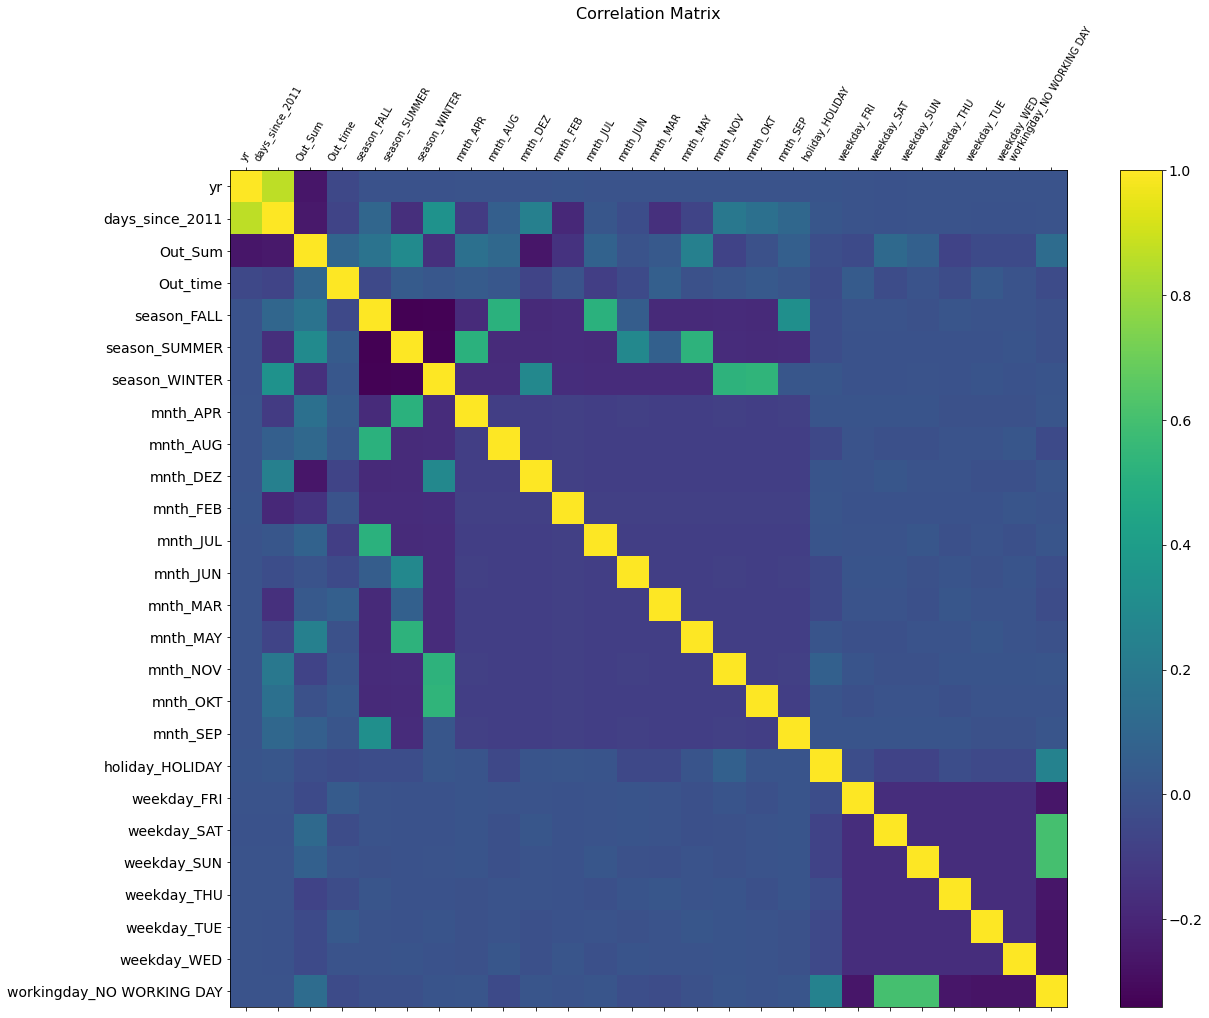

In [53]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(dfout_final.corr(), fignum=f.number)
plt.xticks(range(dfout_final.shape[1]), dfout_final.columns, fontsize=10, rotation=60)
plt.yticks(range(dfout_final.shape[1]), dfout_final.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.savefig("Matrix Correlation")

In [49]:
df_predictors_selected_VIF = drop_column_using_vif_(dfout_final.drop(['Out_Sum',"Out_time"],axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: holiday_HOLIDAY
Dropping: days_since_2011
Dropping: season_FALL
Dropping: workingday_NO WORKING DAY
Dropping: season_WINTER
Dropping: season_SUMMER
The columns remaining after VIF selection are:
Index(['yr', 'mnth_APR', 'mnth_AUG', 'mnth_DEZ', 'mnth_FEB', 'mnth_JUL',
       'mnth_JUN', 'mnth_MAR', 'mnth_MAY', 'mnth_NOV', 'mnth_OKT', 'mnth_SEP',
       'weekday_FRI', 'weekday_SAT', 'weekday_SUN', 'weekday_THU',
       'weekday_TUE', 'weekday_WED'],
      dtype='object')


In [57]:
model_df = sm.OLS(endog=dfout_final[['Out_Sum']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Out_Sum   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     18.45
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           5.03e-48
Time:                        17:48:59   Log-Likelihood:                -3159.1
No. Observations:                 731   AIC:                             6356.
Df Residuals:                     712   BIC:                             6444.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          2.3e+04   2747.705      8.371      0.000    1.76e+04    2.84e+04
yr            -11.4202      1.366     -8.360      0.000     -14.102      -8.738
mnth_APR       26.4171      3.344      7.899      0.000      19.851      32.983
mnth_AUG       23.3999      3.318      7.052      0.000      16.886      29.914
mnth_DEZ       -4.0857      3.317     -1.232      0.218     -10.599       2.427
mnth_FEB        4.1689      3.389      1.230      0.219      -2.486      10.823
mnth_JUL       20.7375      3.317      6.252      0.000      14.226      27.249
mnth_JUN       15.0642      3.346      4.503      0.000       8.496      21.632
mnth_MAR       17.8150      3.318      5.369      0.000      11.300      24.330
mnth_MAY       32.7716      3.317      9.879      0.000      26.259      39.284
mnth_NOV        9.8811      3.346      2.954      0.003       3.313      16.449
mnth_OKT       14.2787      3.317      4.305      0.000       7.767      20.791
mnth_SEP       19.8929      3.345      5.947      0.000      13.326      26.460
weekday_FRI    -2.7267      2.556     -1.067      0.286      -7.745       2.291
weekday_SAT     5.9652      2.549      2.340      0.020       0.960      10.970
weekday_SUN     3.4290      2.549      1.345      0.179      -1.575       8.433
weekday_THU    -4.5481      2.556     -1.779      0.076      -9.567       0.471
weekday_TUE    -3.0491      2.555     -1.193      0.233      -8.066       1.968
weekday_WED    -2.8484      2.556     -1.114      0.265      -7.866       2.170
==============================================================================
Omnibus:                      271.067   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1562.142
Skew:                           1.561   Prob(JB):                         0.00
Kurtosis:                       9.445   Cond. No.                     8.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

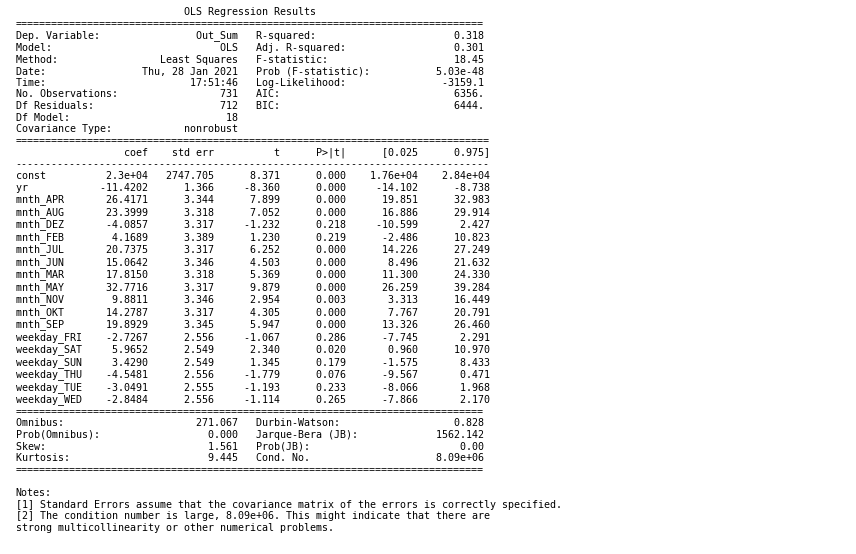

In [58]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model_df.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS.png')

In [ ]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(model_df.summary().as_latex())
f.write(endtex)
f.close()

In [133]:
df_predictors_selected_VIF = drop_column_using_vif_(dfout_final.drop('Out_time', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)
model_df = sm.OLS(endog=dfout_final[['Out_time']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_df.summary()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: holiday_HOLIDAY
Dropping: days_since_2011
Dropping: season_FALL
Dropping: workingday_NO WORKING DAY
Dropping: temp
Dropping: season_WINTER
Dropping: season_SUMMER
The columns remaining after VIF selection are:
Index(['yr', 'hum', 'windspeed', 'Out_Sum', 'mnth_APR', 'mnth_AUG', 'mnth_DEZ',
       'mnth_FEB', 'mnth_JUL', 'mnth_JUN', 'mnth_MAR', 'mnth_MAY', 'mnth_NOV',
       'mnth_OKT', 'mnth_SEP', 'weekday_FRI', 'weekday_SAT', 'weekday_SUN',
       'weekday_THU', 'weekday_TUE', 'weekday_WED', 'weathersit_MISTY',
       'weathersit_RAIN/SNOW/STORM'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Out_time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.275
Date:                Thu, 28 Jan 2021   Prob (F-statistic):              0.175
Time:                        11:27:41   Log-Likelihood:                -3484.0
No. Observations:                 731   AIC:                             7016.
Df Residuals:                     707   BIC:                             7126.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2305.8439   4560.332      0.506      0.613   -6647.570    1.13e+04
yr                            -0.9826      2.266     -0.434      0.665      -5.432       3.467
hum                            0.0938      0.106      0.887      0.375      -0.114       0.301
windspeed                      0.1316      0.226      0.581      0.561      -0.313       0.576
Out_Sum                        0.1427      0.059      2.423      0.016       0.027       0.258
mnth_APR                      -0.9634      5.478     -0.176      0.860     -11.719       9.792
mnth_AUG                      -2.1640      5.431     -0.398      0.690     -12.826       8.498
mnth_DEZ                      -7.4083      5.252     -1.411      0.159     -17.719       2.902
mnth_FEB                      -1.2997      5.314     -0.245      0.807     -11.732       9.133
mnth_JUL                     -12.1150      5.401     -2.243      0.025     -22.720      -1.510
mnth_JUN                      -6.4138      5.332     -1.203      0.229     -16.883       4.056
mnth_MAR                       2.4397      5.305      0.460      0.646      -7.976      12.856
mnth_MAY                      -7.5243      5.643     -1.333      0.183     -18.603       3.555
mnth_NOV                      -1.4873      5.314     -0.280      0.780     -11.921       8.946
mnth_OKT                      -0.5964      5.366     -0.111      0.912     -11.132       9.939
mnth_SEP                      -3.9282      5.519     -0.712      0.477     -14.764       6.908
weekday_FRI                    5.4735      4.017      1.363      0.173      -2.412      13.359
weekday_SAT                   -1.2676      4.012     -0.316      0.752      -9.145       6.610
weekday_SUN                    1.6243      3.998      0.406      0.685      -6.225       9.473
weekday_THU                    0.2750      4.021      0.068      0.945      -7.619       8.169
weekday_TUE                    4.2762      4.006      1.068      0.286      -3.588      12.140
weekday_WED                    2.0093      4.017      0.500      0.617      -5.877       9.895
weathersit_MISTY               1.7772      2.840      0.626      0.532      -3.799       7.353
weathersit_RAIN/SNOW/STORM     1.7650      7.327      0.241      0.810     -12.619      16.149
==============================================================================
Omnibus:                       27.971   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.337
Skew:                           0.294   Prob(JB):                     8.67e-11
Kurtosis:                       4.084   Cond. No.                     8.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [139]:
Count_X = dfout_final.loc[:,['Out_Sum']]
model_Count_time= sm.OLS(endog=dfout_final[['Out_time']], exog=sm.add_constant(Count_X)).fit()
model_Count_time.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Out_time   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.719
Date:                Thu, 28 Jan 2021   Prob (F-statistic):            0.00973
Time:                        11:34:38   Log-Likelihood:                -3495.5
No. Observations:                 731   AIC:                             6995.
Df Residuals:                     729   BIC:                             7004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        336.5568      2.429    138.580      0.000     331.789     341.325
Out_Sum        0.1256      0.048      2.592      0.010       0.030       0.221
==============================================================================
Omnibus:                       25.507   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.549
Skew:                           0.274   Prob(JB):                     9.50e-10
Kurtosis:                       4.032   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

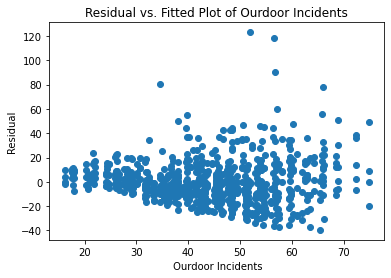

In [55]:
# Residual plot 
plt.scatter(model_df.fittedvalues, model_df.resid)
# adding title and labels
plt.xlabel(' Ourdoor Incidents')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Ourdoor Incidents')
plt.show()